In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker

In [68]:
police_deaths = pd.read_csv("police_deaths_538.csv")
police_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   person       22800 non-null  object
 1   dept         22800 non-null  object
 2   eow          22800 non-null  object
 3   cause        22800 non-null  object
 4   cause_short  22800 non-null  object
 5   date         22800 non-null  object
 6   year         22800 non-null  int64 
 7   canine       22800 non-null  bool  
 8   dept_name    22800 non-null  object
 9   state        22800 non-null  object
dtypes: bool(1), int64(1), object(8)
memory usage: 1.6+ MB


In [69]:
police_deaths.columns

Index(['person', 'dept', 'eow', 'cause', 'cause_short', 'date', 'year',
       'canine', 'dept_name', 'state'],
      dtype='object')

In [70]:
police_deaths.shape

(22800, 10)

In [71]:
police_deaths.head()

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


In [72]:
police_deaths.describe()

,year
count,22800.000000
mean,1951.751272
std,38.233234
min,1791.000000
25%,1924.000000
50%,1952.000000
75%,1983.000000
max,2016.000000


Main reason of how police officers are killed.

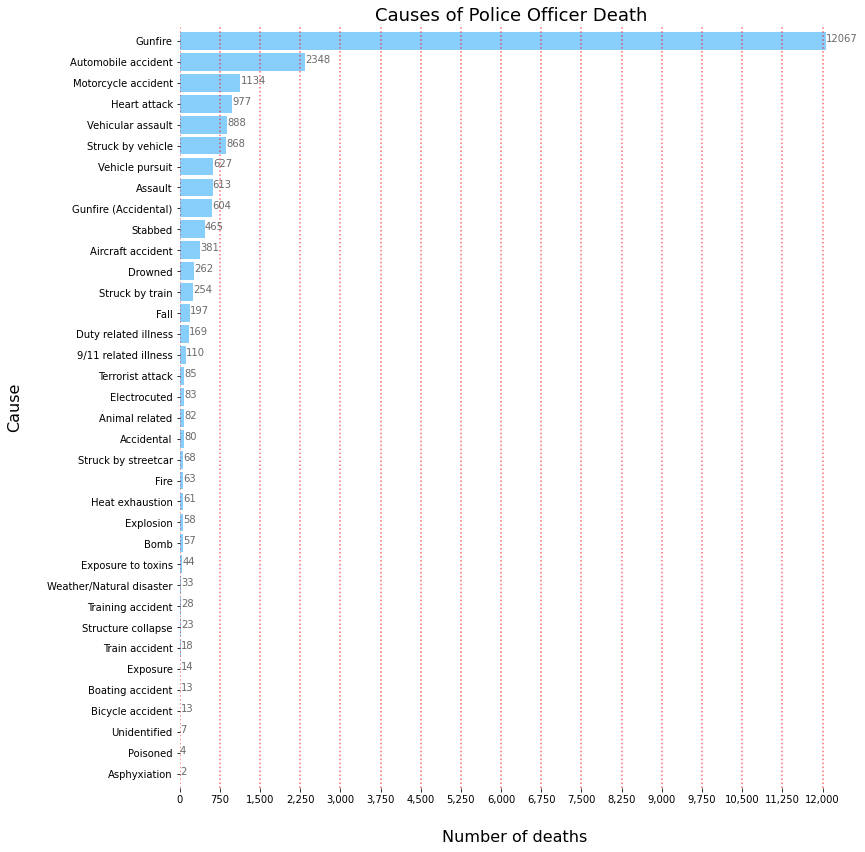

In [73]:
a = pd.pivot_table(police_deaths, index='cause_short', values=['cause'], aggfunc="count").sort_values(
    "cause", axis = 0, ascending = True).plot.barh(figsize=(12,14),color='lightskyblue', width=0.85, xlim=[0, 12500], legend=False)
a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)
a.spines['left'].set_visible(False)
a.spines['bottom'].set_visible(False)
a.xaxis.set_major_locator(ticker.MultipleLocator(750))

values = a.get_xticks()
for tick in values:
    a.axvline( x =tick, linestyle='dotted', alpha=0.6, color='red', zorder=2)

    
a.set_xlabel("Number of deaths", labelpad=25, size=16)
a.set_ylabel("Cause", labelpad=25, size=16)
a.set_title("Causes of Police Officer Death ", size=18)
a.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
totals = []
total = sum(totals)

# set individual bar lables using above list
for i in a.patches:
    # get_width pulls left or right; get_y pushes up or down
    a.text(i.get_width()+.3, i.get_y()+.40, str(round((i.get_width()))),fontsize=10,
color='dimgrey')

Gunshots appear to be the primary factor in police officer killings, followed by automobile and auto accidents. Another important factor was a heart attack. However, based on the graph, it is evident that there is little doubt that the primary factor in the agent killings with respect to other factors is the firearm.

In [74]:
fatal_en= pd.read_csv("fatal_encounters_dot_org.csv")

In [75]:
fatal_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28622 entries, 0 to 28621
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Unique ID                                                       28621 non-null  float64
 1   Subject's name                                                  28622 non-null  object 
 2   Subject's age                                                   27608 non-null  object 
 3   Subject's gender                                                28521 non-null  object 
 4   Subject's race                                                  28621 non-null  object 
 5   Subject's race with imputations                                 28448 non-null  object 
 6   Imputation probability                                          28439 non-null  object 
 7   URL of image of deceased                         

In [76]:
fatal_en.columns

Index(['Unique ID', 'Subject's name', 'Subject's age', 'Subject's gender',
       'Subject's race', 'Subject's race with imputations',
       'Imputation probability', 'URL of image of deceased',
       'Date of injury resulting in death (month/day/year)',
       'Location of injury (address)', 'Location of death (city)',
       'Location of death (state)', 'Location of death (zip code)',
       'Location of death (county)', 'Full Address', 'Latitude', 'Longitude',
       'Agency responsible for death', 'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS',
       'Intentional Use of Force (Developing)',
       'Link to news article or photo of official document',
       'Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS', 'Video',
       'Date&Description', 'Unique ID formula',
       'Unique identifier (redundant)', 'Date (Year)'],
      dtype='object')

In [77]:
fatal_en.describe()

,Unique ID,Location of death (zip code),Latitude,Longitude,Unique ID formula,Unique identifier (redundant),Date (Year)
count,28621.000000,28432.000000,28621.000000,28621.000000,2.000000,28621.000000,28622.000000
mean,14311.000000,58432.535488,36.767127,-95.441638,28059.000000,14311.000000,2011.190972
std,8262.315364,27982.930895,5.160217,16.339723,794.788022,8262.315364,5.837947
min,1.000000,1013.000000,19.034681,-165.591880,27497.000000,1.000000,2000.000000
25%,7156.000000,33159.250000,33.542220,-111.278099,27778.000000,7156.000000,2006.000000
50%,14311.000000,60660.500000,36.692833,-90.556579,28059.000000,14311.000000,2012.000000
75%,21466.000000,85044.000000,40.426677,-82.576535,28340.000000,21466.000000,2016.000000
max,28621.000000,99921.000000,71.301250,-67.266033,28621.000000,28621.000000,2100.000000


In [78]:
fatal_en = fatal_en.iloc[:,[0,2,1,3,4,5,8,10,11,15,16,18,19,22,27]]
fatal_en.head()

,Unique ID,Subject's age,Subject's name,Subject's gender,Subject's race,Subject's race with imputations,Date of injury resulting in death (month/day/year),Location of death (city),Location of death (state),Latitude,Longitude,Cause of death,A brief description of the circumstances surrounding the death,Link to news article or photo of official document,Unique identifier (redundant)
0,25746.0,17,Samuel H. Knapp,Male,European-American/White,European-American/White,01/01/2000,Willits,CA,39.470883,-123.361751,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,https://drive.google.com/file/d/10DisrV8K5ReP1...,25746.0
1,25747.0,21,Mark A. Horton,Male,African-American/Black,African-American/Black,01/01/2000,Detroit,MI,42.404526,-83.092274,Vehicle,Two Detroit men killed when their car crashed ...,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,25747.0
2,25748.0,19,Phillip A. Blurbridge,Male,African-American/Black,African-American/Black,01/01/2000,Detroit,MI,42.404526,-83.092274,Vehicle,Two Detroit men killed when their car crashed ...,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,25748.0
3,25749.0,23,Mark Ortiz,Male,Hispanic/Latino,Hispanic/Latino,01/01/2000,Carlsbad,NM,32.450080,-104.237643,Vehicle,A motorcycle was allegedly being driven errati...,https://drive.google.com/file/d/1qAEefRjX_aTtC...,25749.0
4,1.0,24,LaTanya Janelle McCoy,Female,African-American/Black,African-American/Black,01/02/2000,Sacramento,CA,38.473949,-121.433776,Vehicle,LaTanya Janelle McCoy's car was struck from be...,http://www.recordnet.com/article/20000110/A_NE...,1.0


Text(0.5, 1.0, 'Causes of People Death per State  ')

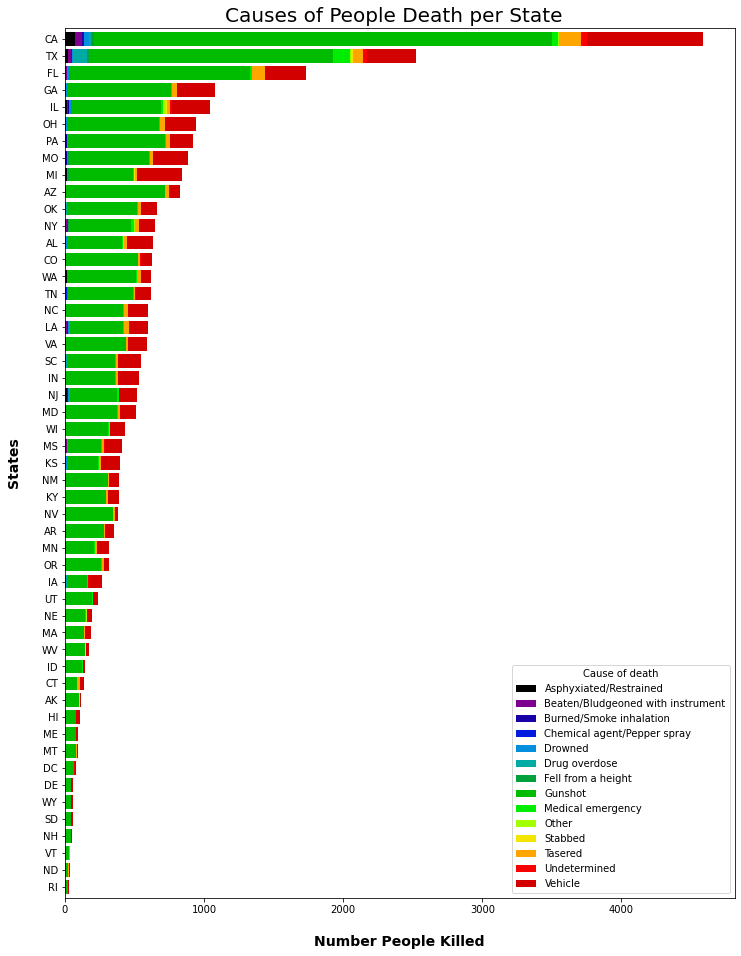

In [79]:
#police_deaths_by_state = pd.pivot_table(police_deaths,index='state', values=['cause'], columns = ['cause_short'], aggfunc="count").fillna(value=0)
fatal_en_pv = pd.pivot_table(fatal_en,index=['Location of death (state)'],values = ['Unique ID'],columns = ['Cause of death'], aggfunc="count").fillna(value=0)
fatal_en_pv.columns = fatal_en_pv.columns.droplevel()
fatal_en_pv.loc[:,'Total'] = fatal_en_pv.sum(axis=1)
fatal_en_pv.sort_values("Total", axis = 0, ascending = True, inplace=True)
colors2 = plt.cm.nipy_spectral(np.linspace(0, 1, 15))
a2 = fatal_en_pv.drop(['Total'], axis = 1).plot.barh(figsize=(12,16),stacked=True, width=0.80,color=colors2 )
a2.set_xlabel("Number People Killed", labelpad=20, weight='bold',size=14)
a2.set_ylabel("States", labelpad=20, weight='bold', size=14)
a2.set_title("Causes of People Death per State  ", size=20)
#fatal_encounters_pv.head()

Making a distinction by state, it is once more apparent that gunshot was the primary factor in the fatalities. After then, cars started killing people.
The states with the most fatalities appear to be California, Texas, and Florida.

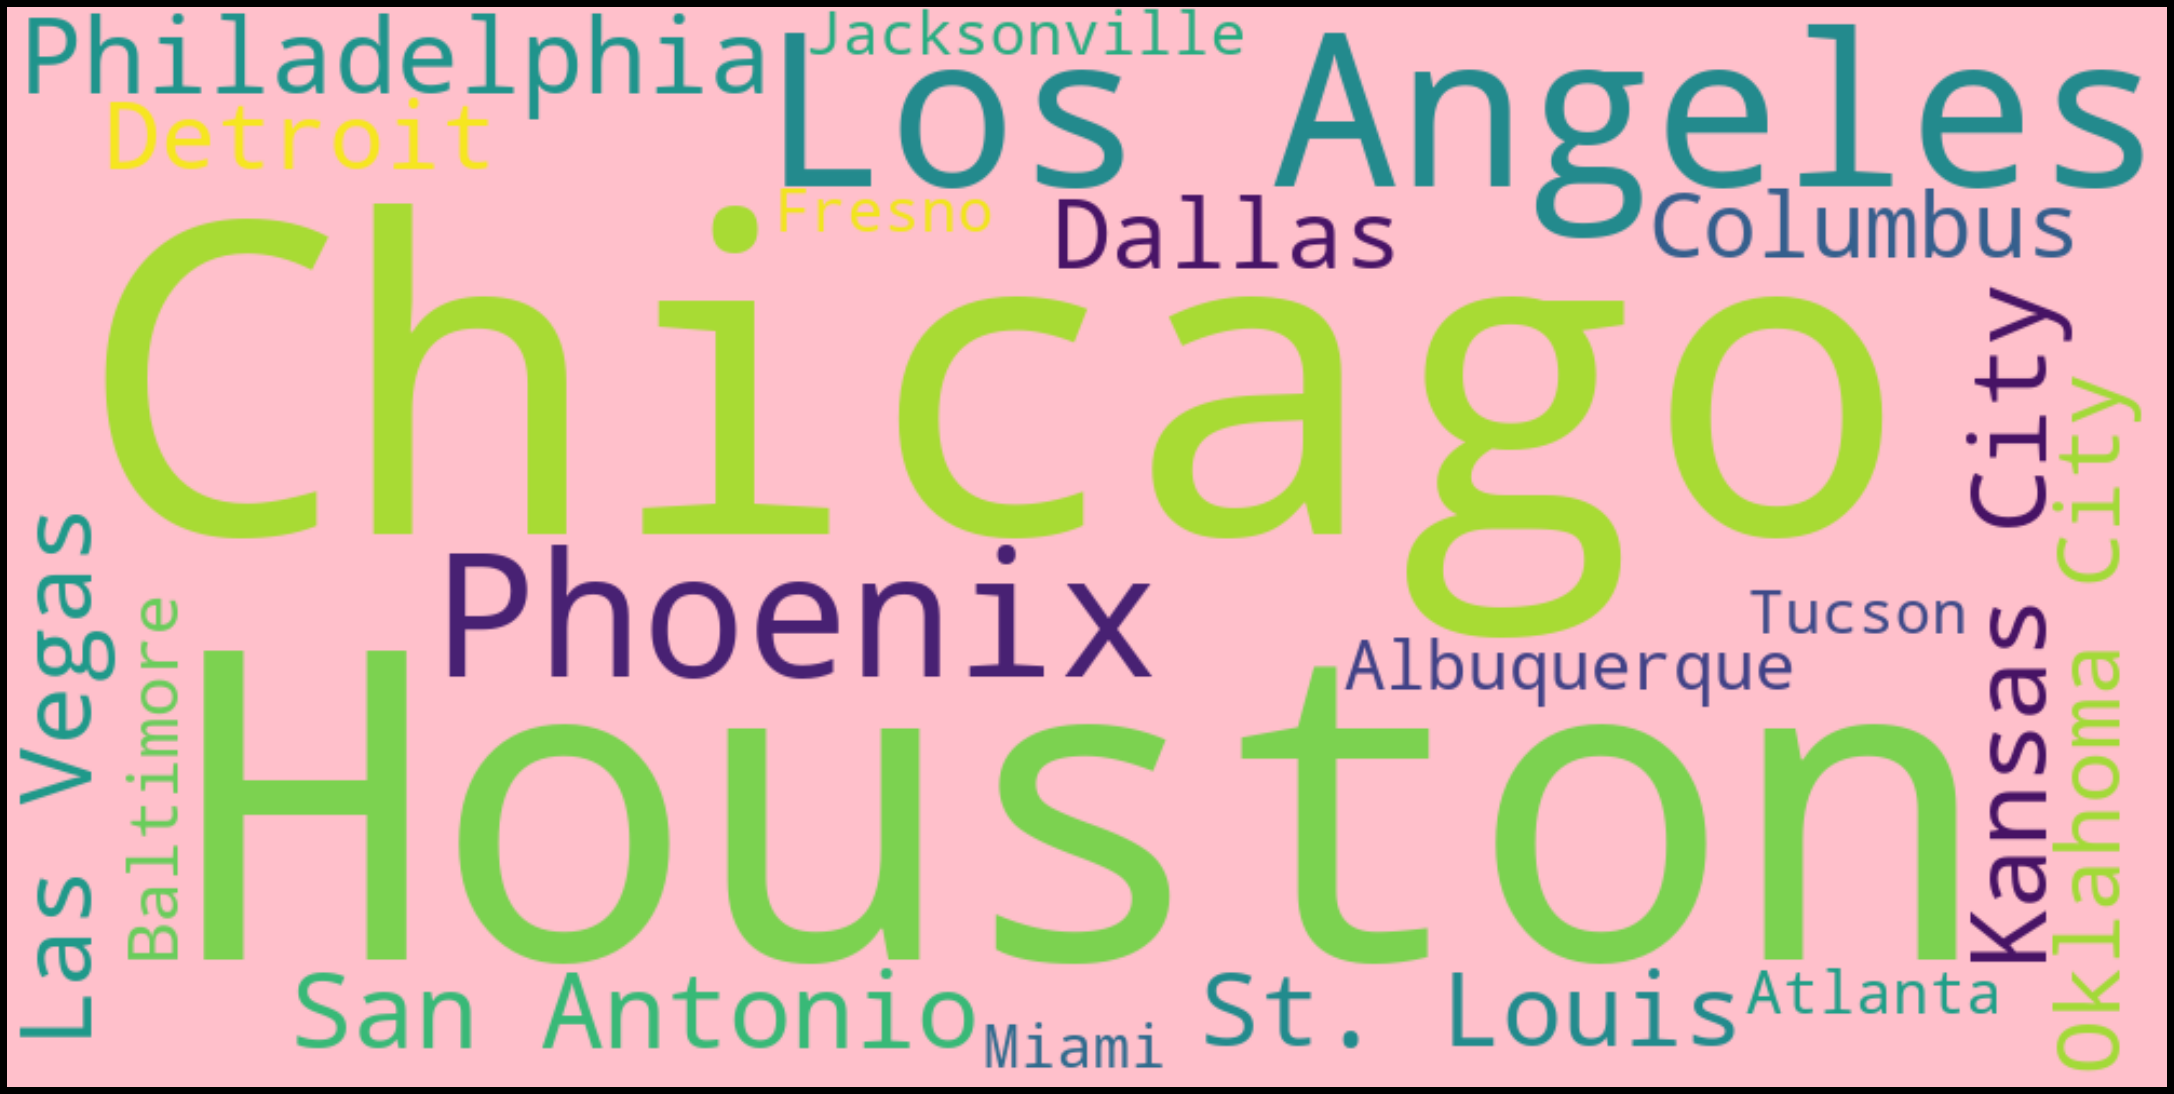

In [80]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
fatal_en.rename(columns = {"Location of death (city)" : "Location"} , inplace=True)
text_list = []
for i in range(len(fatal_en['Location'])):
    text_list.append(str(fatal_en['Location'][i]))

from collections import Counter
word_could_dict=Counter(text_list)

wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'pink',max_words=20).generate_from_frequencies(word_could_dict)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Chicago was the bloodiest city, followed by Houston and Los Angeles, according to an analysis of the above graph for the top 20 cities.

In [81]:
shootings = pd.read_csv("shootings_wash_post.csv")
shootings.describe()
d = {'W': 'White', 'B': 'Black','A': 'Asian','N': 'Native','H':'Hispanic', 'O': 'Other'}
gend = {'M': 'Male', 'F': 'Female'}
shootings["gender"] = shootings["gender"].map(gend)
shootings["race"] = shootings["race"].map(d)
shootings.isna().sum()
shootings['armed'].fillna('No', inplace=True)
shootings['age'].fillna(0, inplace=True)
shootings['race'].fillna('Other', inplace=True)
shootings['flee'].fillna('Not specified', inplace=True)
shootings.rename(columns = {"signs_of_mental_illness" : "Signs Mental illness"} , inplace=True)
shootings.isna().sum()
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,Signs Mental illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False


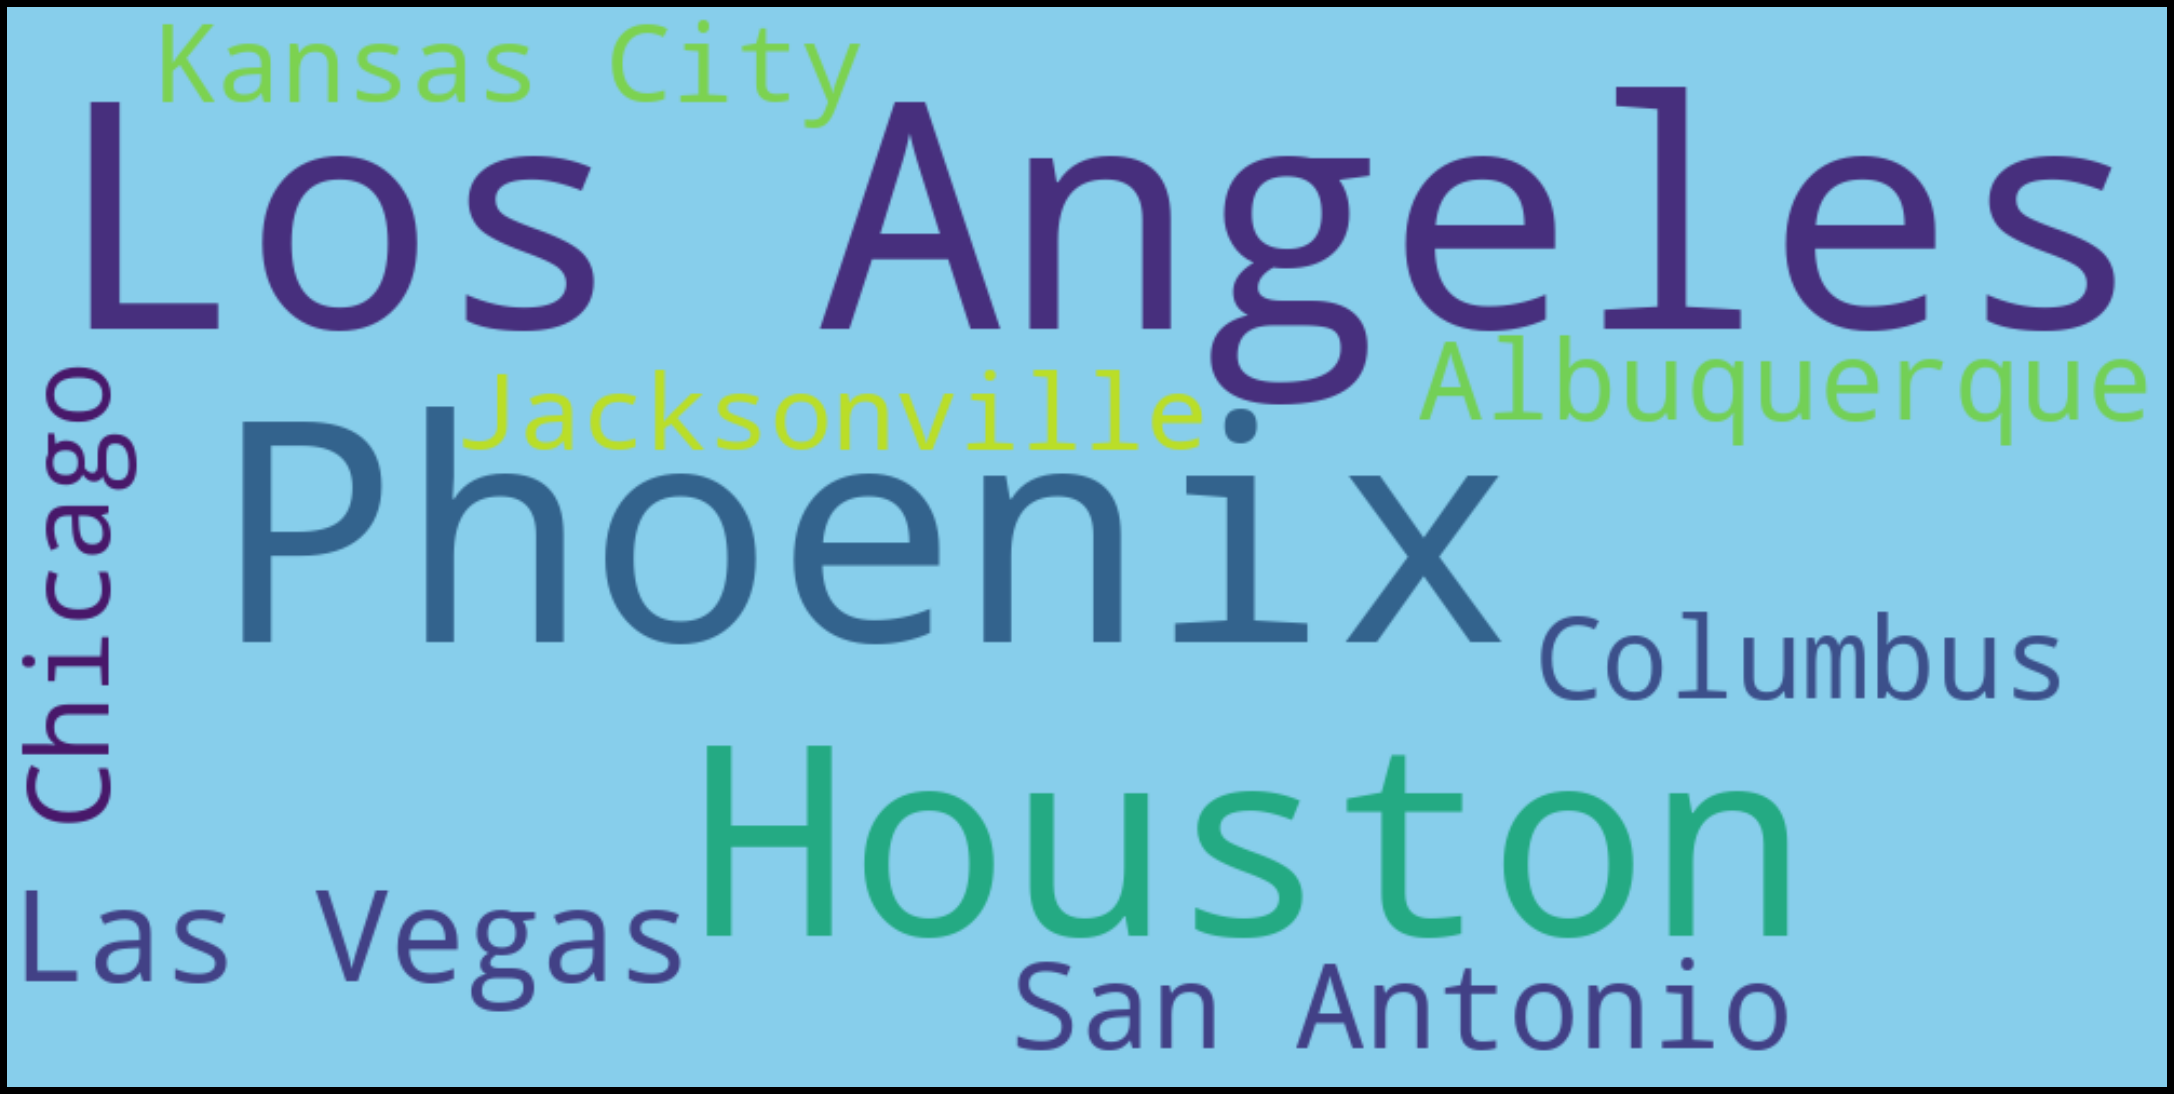

In [82]:
text_list = []
for i in range(len(shootings["city"])):
    text_list.append(str(shootings["city"][i]))

from collections import Counter
word_could_dict=Counter(text_list)

wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'skyblue',max_words=10).generate_from_frequencies(word_could_dict)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Los Angeles and Houston were the bloodiest cities, followed by Phoenix and Las Vegas, as we have seen for the data up to 2016 and in this data bounce up to 2020.

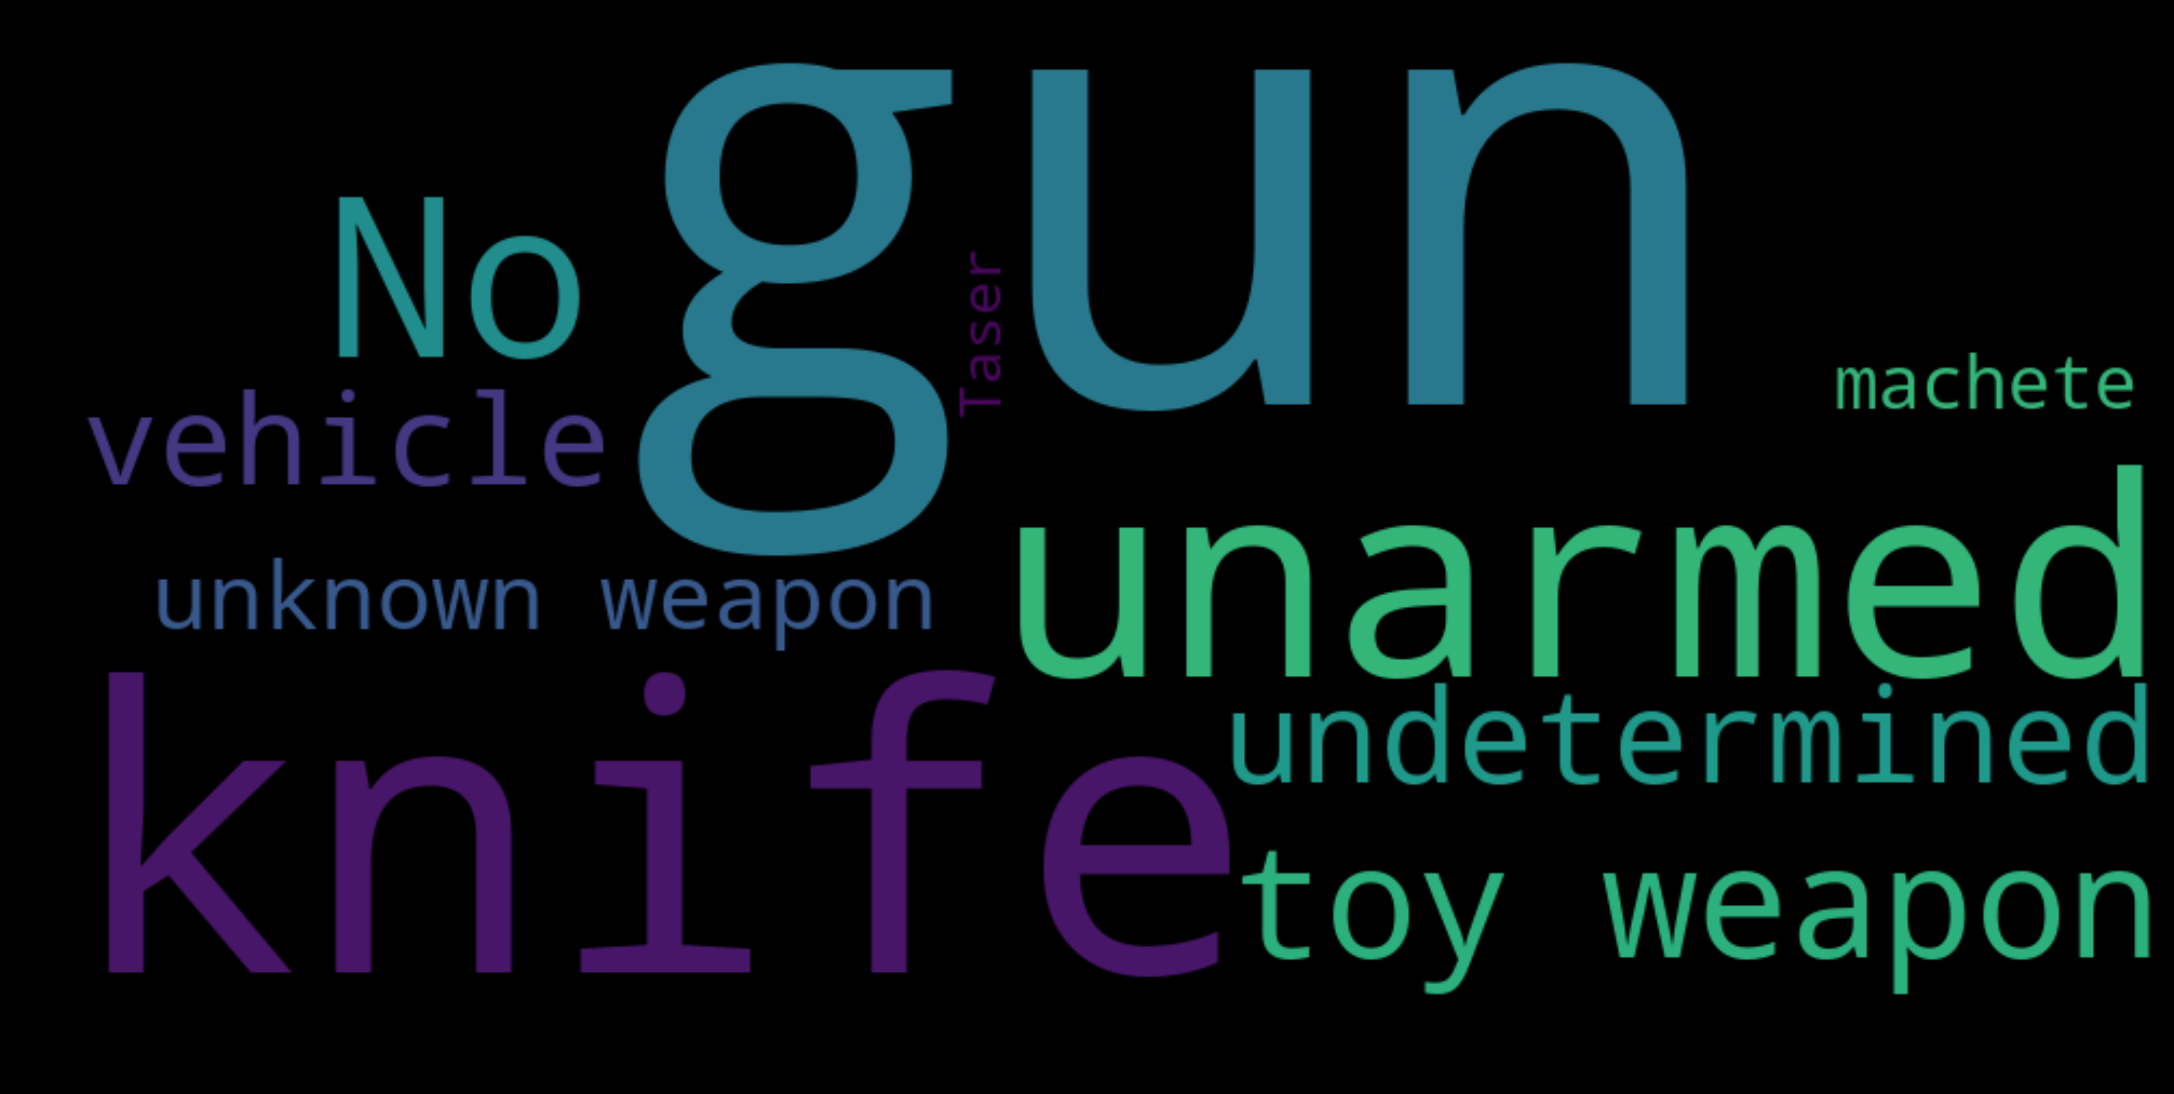

In [83]:
text_list = []
for i in range(len(shootings["armed"])):
    text_list.append(str(shootings["armed"][i]))

from collections import Counter
word_could_dict=Counter(text_list)

wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',max_words=10).generate_from_frequencies(word_could_dict)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Most of the victims had guns, but some also had knives or toy weapons. Many times, there were no weapons present or none were even found on the people.

In [84]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [85]:
shootings['date'] = pd.to_datetime(shootings['date'])
shootings['year'] = shootings['date'].dt.year
shootings['month'] = shootings['date'].dt.month
shootings['day'] = shootings['date'].dt.day
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,Signs Mental illness,threat_level,flee,body_camera,year,month,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,WA,True,attack,Not fleeing,False,2015,1,2
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,OR,False,attack,Not fleeing,False,2015,1,2
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015,1,3
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,CA,True,attack,Not fleeing,False,2015,1,4
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015,1,4


<function matplotlib.pyplot.show(*args, **kw)>

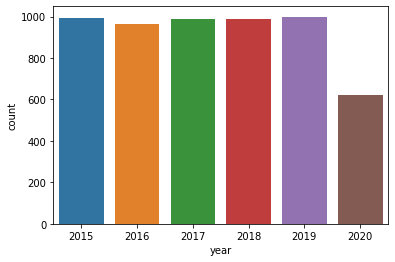

In [86]:
sns.countplot(data = shootings, x = 'year')
plt.show

In [87]:
df_mod =shootings[shootings.year != 2022]
df_mod

,id,name,date,manner_of_death,armed,age,gender,race,city,state,Signs Mental illness,threat_level,flee,body_camera,year,month,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,WA,True,attack,Not fleeing,False,2015,1,2
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,OR,False,attack,Not fleeing,False,2015,1,2
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015,1,3
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,CA,True,attack,Not fleeing,False,2015,1,4
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547,6048,TK TK,2020-08-15,shot,knife,0.0,Male,Other,Denver,CO,False,attack,Not fleeing,False,2020,8,15
5548,6042,Thomas Moles,2020-08-16,shot,undetermined,35.0,Male,White,Maury County,TN,False,other,Other,False,2020,8,16
5549,6043,Jose Manuel Castro,2020-08-16,shot,knife,27.0,Male,Hispanic,Dos Palos,CA,False,other,Not fleeing,False,2020,8,16
5550,6044,Jeffrey Hubbard,2020-08-16,shot,gun,67.0,Male,White,Las Vegas,NV,True,other,Not fleeing,False,2020,8,16


In [88]:
GB_Y = df_mod.groupby("year")
fig = px.line(GB_Y.count().date, title='Number of Shootings by year',markers=True)
fig.show()

In [89]:
GB_M = df_mod.groupby('month')
fig = px.line(GB_M.count().date, title='Number of Shootings by month',markers=True)
fig.show()

In [90]:
GB_D = df_mod.groupby('day')
fig = px.line(GB_D.count().date, title='Number of Shootings by day',markers=True)
fig.show()

In [91]:
df_year_month = df_mod.groupby(by=['year','month']).count().date
df_year_month = df_year_month.reset_index().pivot('year','month','date').transpose()

fig = px.line(np.cumsum(df_year_month), title='Number of Shootings Cumulative',markers=True)
fig.show()

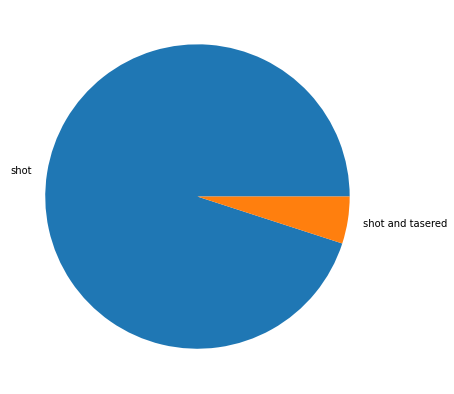

shot                5275
shot and Tasered     277
Name: manner_of_death, dtype: int64


In [93]:
plt.figure(figsize=(7,7))
plt.pie(shootings.manner_of_death.value_counts(), labels=['shot', 'shot and tasered'])
plt.show()

print(shootings.manner_of_death.value_counts())

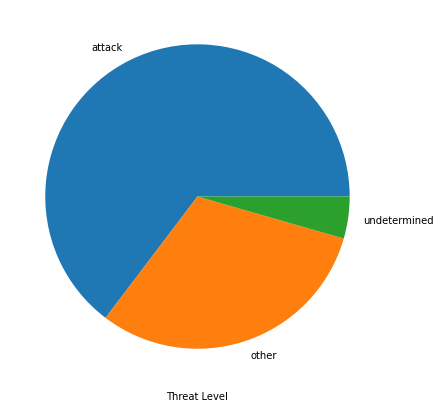

attack          3591
other           1714
undetermined     247
Name: threat_level, dtype: int64

In [96]:
plt.figure(figsize=(7,7))
plt.pie(df_mod.threat_level.value_counts(), labels=['attack', 'other', 'undetermined'])
plt.xlabel('Threat Level')
plt.show()
df_mod.threat_level.value_counts()

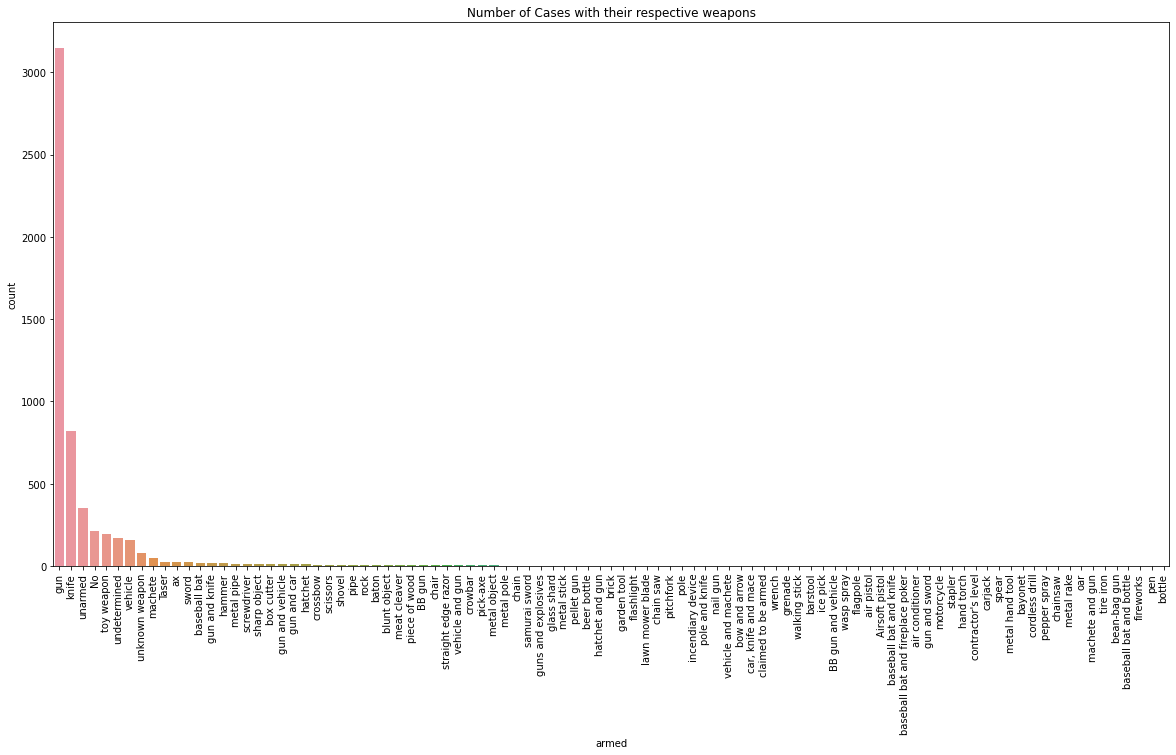

gun                3146
knife               818
unarmed             355
No                  213
toy weapon          193
undetermined        168
vehicle             159
unknown weapon       79
machete              46
Taser                26
ax                   24
sword                23
baseball bat         18
gun and knife        18
hammer               16
metal pipe           13
screwdriver          13
sharp object         13
box cutter           12
gun and vehicle      11
gun and car          11
hatchet              11
crossbow              9
scissors              7
shovel                6
pipe                  6
Name: armed, dtype: int64

In [97]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_mod,x='armed',order=shootings['armed'].value_counts().index)
plt.title("Number of Cases with their respective weapons")
plt.xticks(rotation=90)
plt.show()
armed = df_mod.armed.value_counts()
armed.head(26)

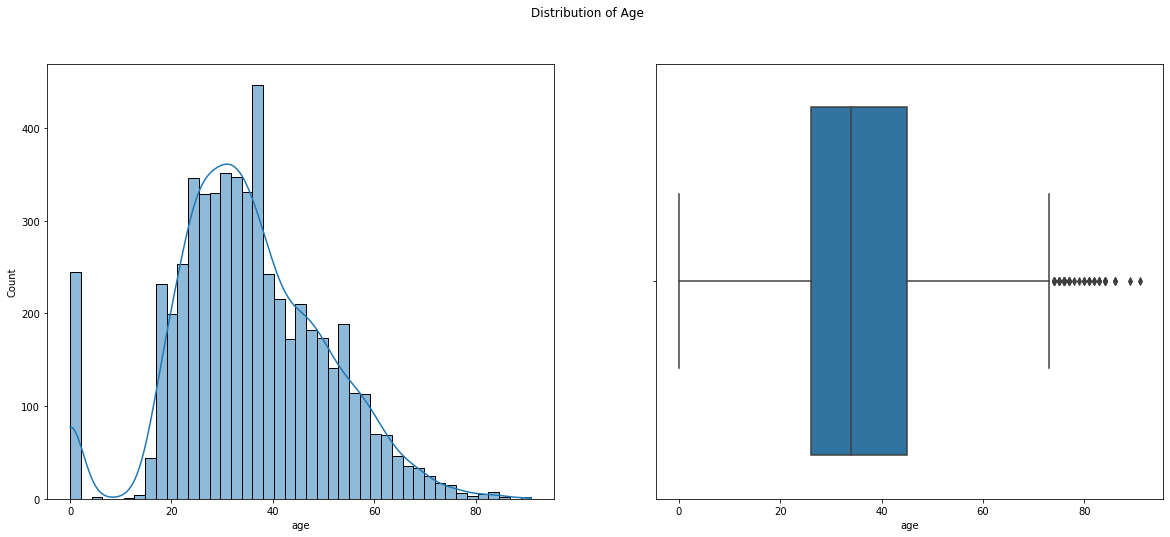

In [98]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
sns.histplot(data=df_mod,x='age',kde=True,ax=ax[0])

sns.boxplot(x=df_mod['age'],ax=ax[1])
plt.suptitle("Distribution of Age")
plt.show()

**Observation**\
Most of the people's age lie between 20-45 as most of the people were young.

In [99]:
df_year_state = df_mod.groupby(by=['year','state']).count().date
df_year_state = df_year_state.reset_index()
df_year_state.columns = ['year','state','count']
fig = px.choropleth(df_year_state,
                    locations='state', 
                    locationmode="USA-states",
                    color='count',
                    color_continuous_scale="Viridis_r", 
                    scope="usa",
                    animation_frame='year',
                    title="Incidents Observed in Each State Over the Year") 
fig.show()

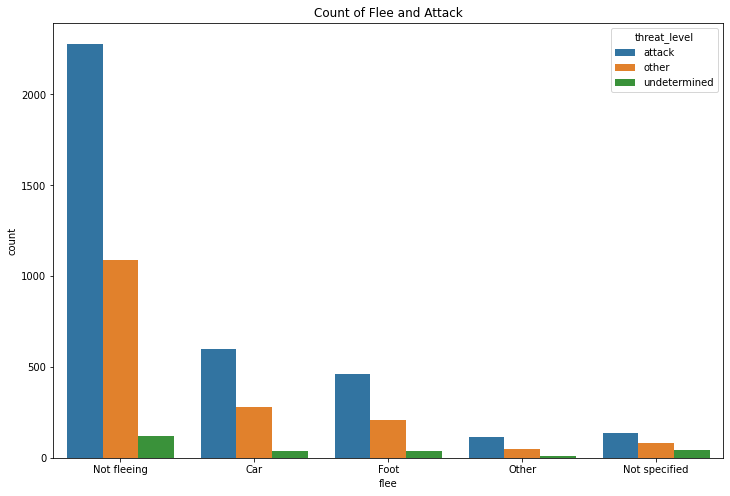

Not fleeing      3489
Car               917
Foot              710
Not specified     262
Other             174
Name: flee, dtype: int64

In [101]:
plt.figure(figsize=(12,8))
sns.countplot(data=shootings,x='flee',hue='threat_level')
plt.title("Count of Flee and Attack")
plt.show()
df_mod.flee.value_counts()

**Observation**\
Most of the people tried to attack irrespective of their fleeing intention.